
#**Introduction**
The task focuses on addressing overfitting in a classification problem using a Decision Tree model. Decision Trees are powerful classifiers but are prone to overfitting when trained without constraints, especially on clean and precise data. Overfitting occurs when the model learns specific patterns and noise from the training data, leading to poor generalization on unseen data.



#**Methodology**
**Data Preparation:** The dataset was preprocessed by selecting relevant features while excluding irrelevant ones like "Star Type," "Spectral Class," and "Star Color." The target variable chosen for classification was Star Category. The dataset was then split into training and testing sets for evaluation.

**Overfitted Model:** A Decision Tree classifier was trained on the clean training data without depth constraints (max_depth=None).

**Noise Injection for Regularization:** To regularize the overfitted model, Gaussian noise with a mean of 0 and a small standard deviation of 0.1 was added to the training input features.

**Evaluation:** The training and testing accuracies were recorded for both the overfitted and regularized models.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



In [3]:
# Load the dataset
file_path = '/content/Stars.csv'
data = pd.read_csv(file_path)
data

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


In [5]:
# Display dataset info
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB
None


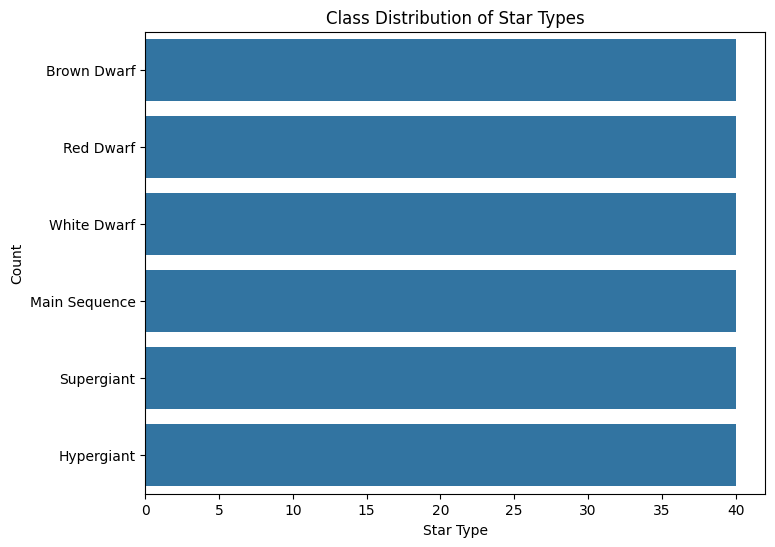

In [12]:
# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['Star category'])
plt.title("Class Distribution of Star Types")
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.show()


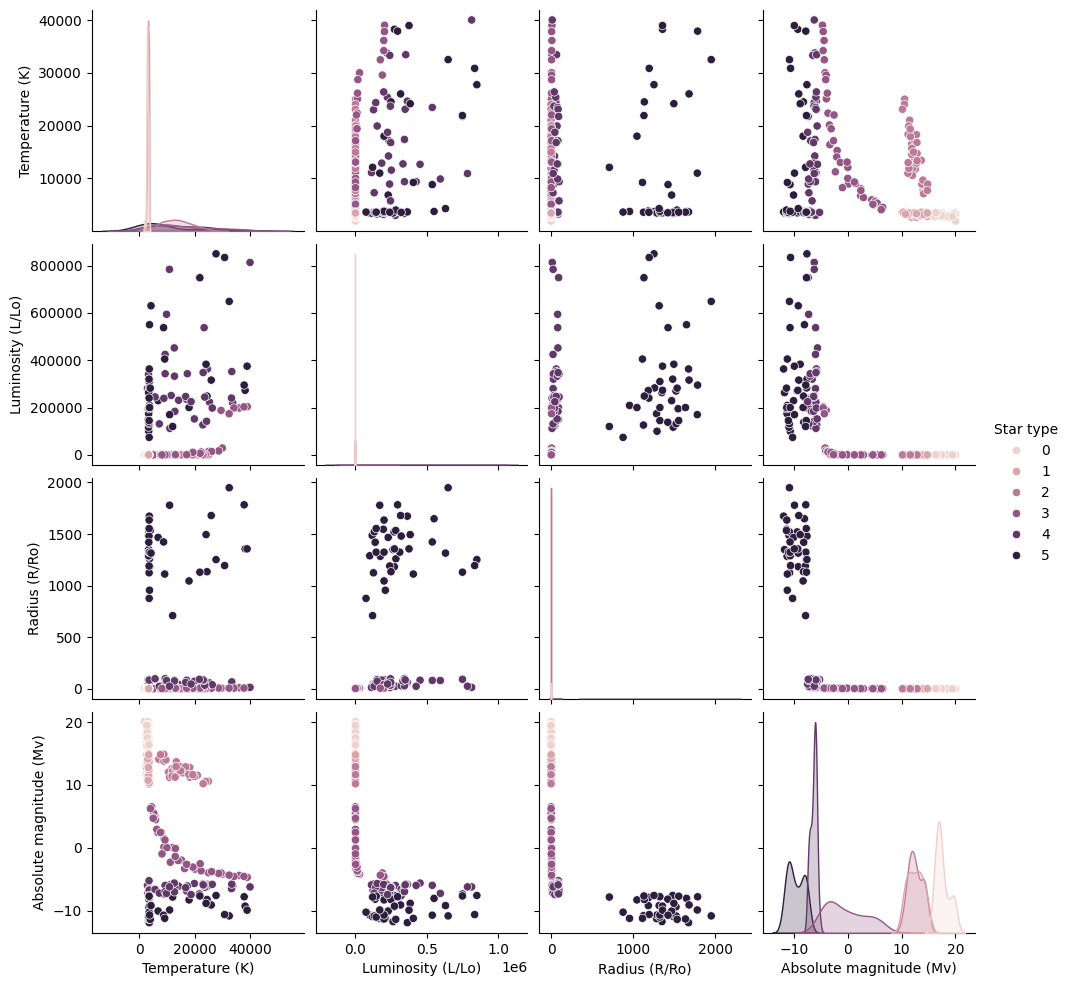

In [11]:
# Pairplot to visualize relationships (select relevant features if needed)
sns.pairplot(data, hue='Star type')
plt.show()

In [14]:
# Select features and target
X = data.drop(columns=['Star category', 'Star type', 'Spectral Class', 'Star color'])  # Drop unnecessary columns
y = data['Star category']

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train a Decision Tree Classifier with high depth
model = DecisionTreeClassifier(max_depth=None, random_state=42)  # No restriction on depth
model.fit(X_train, y_train)

# Evaluate on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report (Test):
                precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00        11
Main Sequence       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         7
   Supergiant       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



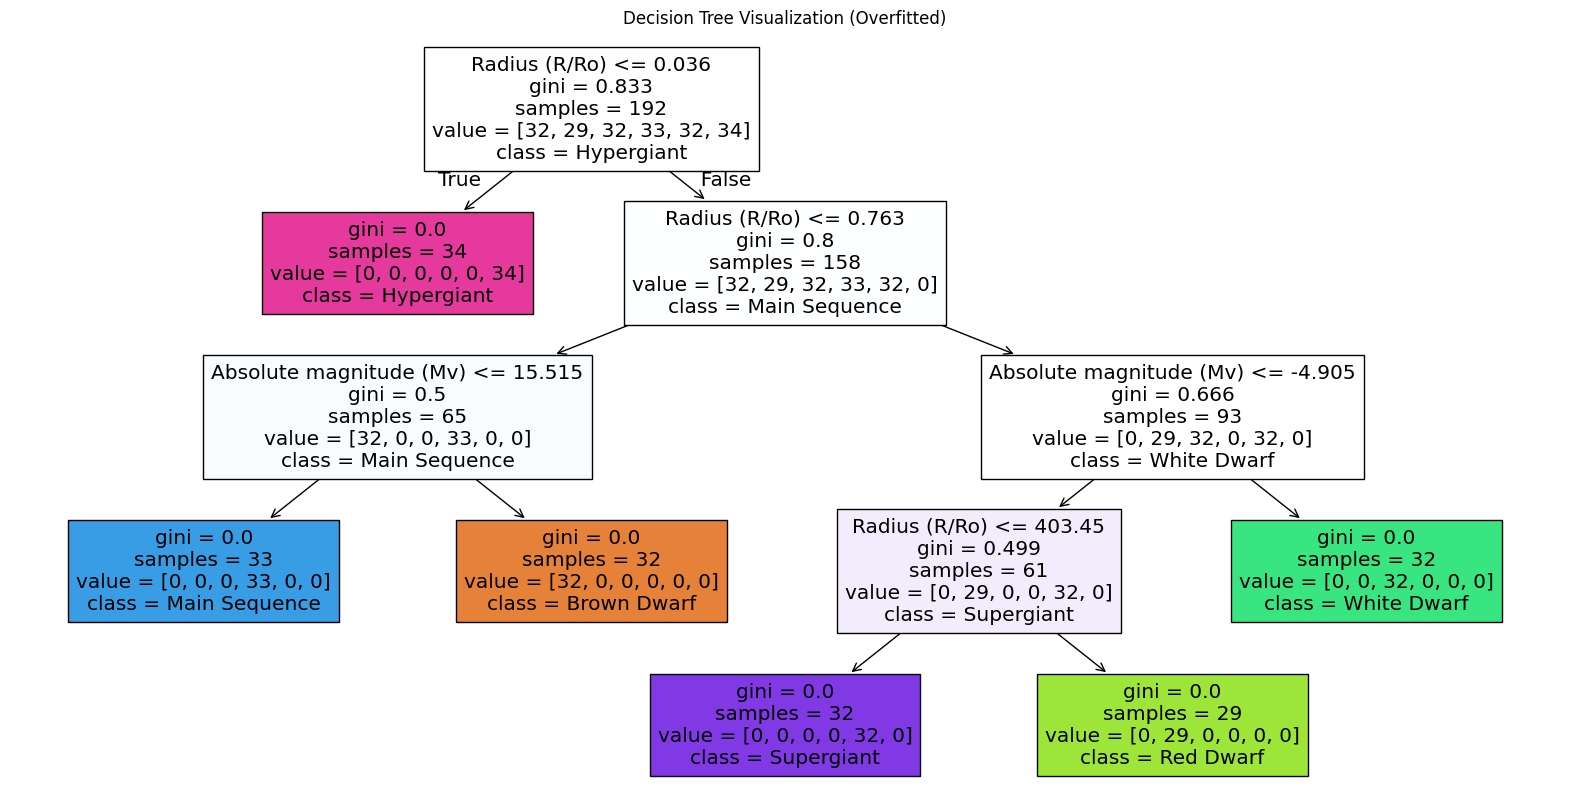

In [18]:
from sklearn.tree import plot_tree

class_names = list(y.unique())

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=class_names
)
plt.title("Decision Tree Visualization (Overfitted)")
plt.show()



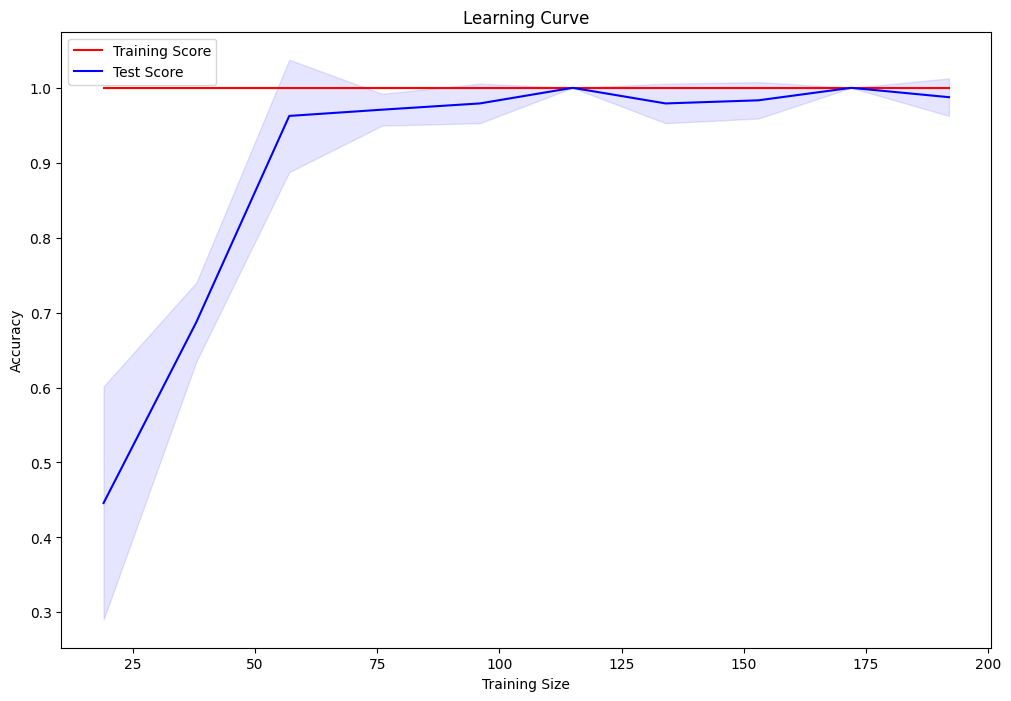

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label="Training Score", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="red")
plt.plot(train_sizes, test_mean, label="Test Score", color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="blue")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


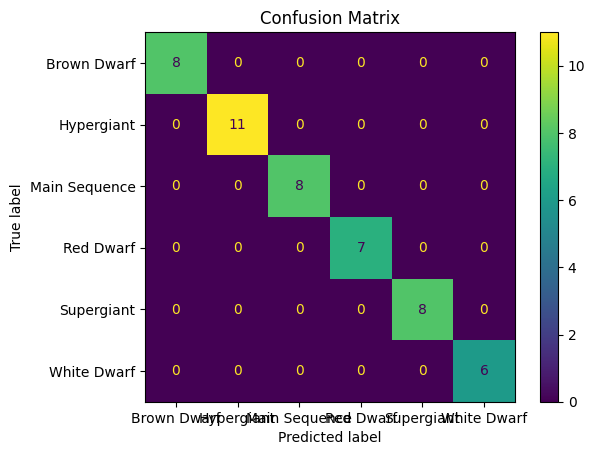

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="viridis", values_format='d')
plt.title("Confusion Matrix")
plt.show()
